In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.linalg as la
from math import sqrt
from keras.datasets import mnist
import pdb
print("Modules Imported!")

Modules Imported!


In [6]:
(full_train_X, full_train_y), (full_test_X, full_test_y) = mnist.load_data()
train_X = []
train_y = []
test_X = []
test_y = []

for i in range(0, len(full_train_y)):
    if full_train_y[i] == 0 or full_train_y[i] == 1:
        train_X.append(full_train_X[i].reshape(1, 784)/255)
        train_y.append(full_train_y[i])
for i in range(0, len(full_test_y)):
    if full_test_y[i] == 0 or full_test_y[i] == 1:
        test_X.append(full_test_X[i].reshape(1, 784)/255)
        test_y.append(full_test_y[i])

train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

d = 28*28 #dimension
N = len(train_X)

initial_weights = np.random.randn(d) / np.sqrt(d) #initialize weights

X_train: (12665, 1, 784)
Y_train: (12665,)
X_test:  (2115, 1, 784)
Y_test:  (2115,)


In [39]:
def grad_desc(w, X, y, rho, loss):
    # w are the initial weights, should be of shape (1, d) where d is dimensionality
    # X is the X training data, should be of shape (N, d) where N is number of samples, d is dimensionality
    # y is the y training data, should be of shape (N, 1) where N is the number of samples
    # rho is the learning rate
    # loss is an empty array
    
    ones = np.ones(y.shape) #make array of 1s to be used for addition and subtraction in sigmoid and loss/likelihood function
    
    sig = ones/(ones + np.exp(-1*np.dot(X, w.T))) #put weights into sigmoid function
    train_loss = np.sum(y*np.log(ones/sig) + (ones-y)*(np.log(ones/(ones-sig)))) / N #compute training loss
    loss.append(train_loss)
    #print("Iteration 0 training loss: " + str(train_loss)) #print the initial loss
        
    for i in range(1, 50): #30 iterations for learning
        h = np.exp(-1*np.dot(X, w.T)) #e^(-w*X) ... shape: (N, 1)
        y_shift = np.subtract(y, ones) #make y output have 0, -1 instead of 1, 0
        z = y_shift + np.divide(h, np.add(ones, h)) #taking (y + h/(1+h)) part of the gradient of log likelihood ... shape: (N, 1)
        gradL = np.dot(z.T, X) / N #compute the gradient of the loss function ... shape: (1, d)
        w = w + rho*gradL #update the weights
        
        sig = ones/(ones + np.exp(-1*np.dot(X, w.T))) #put weights into sigmoid function
        train_loss = np.sum(y*np.log(ones/sig) + (ones-y)*(np.log(ones/(ones-sig)))) / N #compute training loss
        loss.append(train_loss)
        #print("Iteration " + str(i) + " training loss: " + str(train_loss))
        
    return w #return weights

In [30]:
w = initial_weights.reshape(1, -1)
X = train_X.reshape(-1, d)
y = train_y.reshape(-1, 1)
rho = 0.05
gd_train_loss = []
w = grad_desc(w, X, y, rho, gd_train_loss)
correct = 0
for i in range(0, len(test_X)):
    model_output = np.dot(w, test_X[i].T)
    if model_output > 0 and test_y[i] == 1:
        correct += 1
    elif model_output < 0 and test_y[i] == 0:
        correct += 1
print(correct/len(test_X))

Iteration 0 training loss: 0.7438488792349337
Iteration 1 training loss: 0.5880776465994997
Iteration 2 training loss: 0.48756952727564706
Iteration 3 training loss: 0.4155791362938052
Iteration 4 training loss: 0.3614220569215988
Iteration 5 training loss: 0.31945195345608407
Iteration 6 training loss: 0.28616278806450307
Iteration 7 training loss: 0.2592282130454376
Iteration 8 training loss: 0.23705174976037313
Iteration 9 training loss: 0.21851084049651626
Iteration 10 training loss: 0.2027992041951292
Iteration 11 training loss: 0.18932624522692237
Iteration 12 training loss: 0.17765139598113985
Iteration 13 training loss: 0.1674404216652415
Iteration 14 training loss: 0.1584357996562328
Iteration 15 training loss: 0.15043627878562976
Iteration 16 training loss: 0.14328253030553692
Iteration 17 training loss: 0.13684691025188622
Iteration 18 training loss: 0.1310260426251582
Iteration 19 training loss: 0.12573536863664475
Iteration 20 training loss: 0.12090508692179182
Iteration 2

In [40]:
def natural_grad_desc(w, X, y, rho, loss):
    # w are the initial weights, should be of shape (1, d) where d is dimensionality
    # X is the X training data, should be of shape (N, d) where N is number of samples, d is dimensionality
    # y is the y training data, should be of shape (N, 1) where N is the number of samples
    # rho is the learning rate
    # loss is an empty array
    
    ones = np.ones(y.shape) #make array of 1s to be used for addition and subtraction in sigmoid and loss/likelihood function
    
    sig = ones/(ones + np.exp(-1*np.dot(X, w.T))) #put weights into sigmoid function
    train_loss = np.sum(y*np.log(ones/sig) + (ones-y)*(np.log(ones/(ones-sig)))) / N #compute training loss
    loss.append(train_loss)
    #print("Iteration 0 training loss: " + str(train_loss)) #print the initial loss
        
    for i in range(1, 50): #30 iterations for learning
        h = np.exp(-1*np.dot(X, w.T)) #e^(-w*X) ... shape: (N, 1)
        y_shift = np.subtract(y, ones) #make y output have 0, -1 instead of 1, 0
        z = y_shift + np.divide(h, np.add(ones, h)) #taking (y + h/(1+h)) part of the gradient of log likelihood ... shape: (N, 1)
        G = X * z #gradient of the log likelihood ... shape: (N, d)
        F = np.dot(G.T, G) / N #compute the Fisher info matrix ... shape: (d, d)
        F = F + np.eye(X.shape[1])*0.0001 #regularize the fisher matrix to make it invertible
        gradL = np.dot(z.T, X) / N #compute the gradient of the loss function ... shape: (1, d)
        Ng = np.linalg.solve(F, gradL.T) #solve the natural gradient vector ... shape: (d, 1)
        w = w + rho*Ng.T #update the weights
        
        sig = ones/(ones + np.exp(-1*np.dot(X, w.T))) #put weights into sigmoid function
        train_loss = np.sum(y*np.log(ones/sig) + (ones-y)*(np.log(ones/(ones-sig)))) / N #compute training loss
        loss.append(train_loss)
        #print("Iteration " + str(i) + " training loss: " + str(train_loss))
        
    return w #return weights

In [32]:
w = initial_weights.reshape(1, -1)
X = train_X.reshape(-1, d)
y = train_y.reshape(-1, 1)
rho = 0.05
ngd_train_loss = []
w = natural_grad_desc(w, X, y, rho, ngd_train_loss)
correct = 0
for i in range(0, len(test_X)):
    model_output = np.dot(w, test_X[i].T)
    if model_output > 0 and test_y[i] == 1:
        correct += 1
    elif model_output < 0 and test_y[i] == 0:
        correct += 1
print(correct/len(test_X))

Iteration 0 training loss: 0.7438488792349337
Iteration 1 training loss: 0.6969113130405071
Iteration 2 training loss: 0.649999300779318
Iteration 3 training loss: 0.6031237620453782
Iteration 4 training loss: 0.5563018962998327
Iteration 5 training loss: 0.5095602978681135
Iteration 6 training loss: 0.462939709537183
Iteration 7 training loss: 0.4165023984236513
Iteration 8 training loss: 0.3703438111969102
Iteration 9 training loss: 0.3246112918236863
Iteration 10 training loss: 0.27953429113079414
Iteration 11 training loss: 0.23547183771011104
Iteration 12 training loss: 0.19297994419460707
Iteration 13 training loss: 0.15288423825345462
Iteration 14 training loss: 0.11630527395823234
Iteration 15 training loss: 0.08454370244209908
Iteration 16 training loss: 0.058744479238633344
Iteration 17 training loss: 0.039416719282756835
Iteration 18 training loss: 0.026136088394705895
Iteration 19 training loss: 0.017645405633875597
Iteration 20 training loss: 0.012416924747946766
Iteration

[0.6331287  0.51200533 0.43083667 0.37150985 0.32626753 0.29079018
 0.2623444  0.23909962 0.21978903 0.20351396 0.18962294 0.17763435
 0.16718573 0.15799978 0.14986116 0.14260034 0.13608221 0.13019783
 0.12485848 0.11999117 0.11553536 0.11144043 0.1076637  0.104169
 0.10092543 0.09790643 0.0950891  0.09245355 0.08998241 0.08766049
 0.08547441 0.08341236 0.08146385 0.07961956 0.07787117 0.07621122
 0.07463302 0.07313053 0.07169831 0.07033142 0.06902538 0.06777611
 0.0665799  0.06543336 0.06433336 0.06327707 0.06226185 0.06128529
 0.06034516 0.05943941]
[6.33128703e-01 5.86146395e-01 5.39205636e-01 4.92332607e-01
 4.45568204e-01 3.98975795e-01 3.52653453e-01 3.06753593e-01
 2.61515010e-01 2.17315351e-01 1.74754176e-01 1.34767311e-01
 9.87204919e-02 6.83010088e-02 4.48628820e-02 2.84360714e-02
 1.79423037e-02 1.16770667e-02 8.02080993e-03 5.94354947e-03
 4.73954008e-03 3.96755922e-03 3.41281743e-03 2.98596002e-03
 2.64699560e-03 2.37290385e-03 2.14733034e-03 1.95791538e-03
 1.79563343e-03

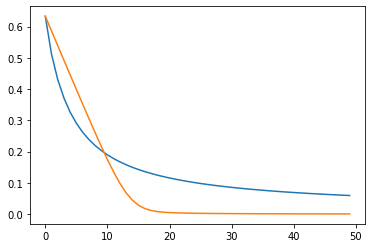

In [41]:
#Experiment

X = train_X.reshape(-1, d)
y = train_y.reshape(-1, 1)
rho = 0.05
gd_losses = []
ngd_losses = []

for i in range(5):
    w = np.random.randn(d) / np.sqrt(d) #random weights
    gd_w = w.reshape(1, -1)
    ngd_w = w.reshape(1, -1)
    gd_loss = []
    ngd_loss = []
    grad_desc(gd_w, X, y, rho, gd_loss)
    natural_grad_desc(ngd_w, X, y, rho, ngd_loss)
    gd_losses.append(gd_loss)
    ngd_losses.append(ngd_loss)

avg_gd_loss = np.mean(np.array(gd_losses), axis=0)
avg_ngd_loss = np.mean(np.array(ngd_losses), axis=0)
iteration = [i for i in range(0, 50)]
#print(avg_gd_loss)
#print(avg_ngd_loss)
plt.plot(iteration, avg_gd_loss)
plt.plot(iteration, avg_ngd_loss)
plt.show()

The natural gradient descent (orange) converges faster than regular gradient descent (blue)